In [1]:
sc

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
ls

MyPlayground.playground/  merged_data               weather-data.ipynb
Untitled.ipynb            month_mean_merged_data    weather-data.pdf
datasets/                 weather-data/             weather-data.py
first_merged_data         weather-data-Copy1.ipynb  weather-data_alpha.py


In [143]:
ls csvfiles/

cour_Air density.csv          cour_Rain.csv
cour_Barometer.csv            cour_Soil Moiture 2.csv
cour_EvapoTranspiration.csv   cour_Soil Moiture.csv
cour_Inside Dew Point.csv     cour_Soil Temperature.csv
cour_Inside Heat Index.csv    cour_Soil Temperature2.csv
cour_Inside Humid.csv         cour_Solar Radiation.csv
cour_Inside Temperature.csv   cour_UV Radiation.csv
cour_Outside Dew Point.csv    cour_Wind Chill.csv
cour_Outside Heat Index.csv   cour_Wind Direction.csv
cour_Outside Humid.csv        cour_Wind Speed.csv
cour_Outside Temperature.csv


In [329]:
def cleaning(dFrame):  # data cleaning
    dFrame[1] = dFrame[1].str.strip(' "time:"')
    dFrame[3] = dFrame[3].str.strip(' "value:"').str.rstrip("}")
    dFrame = dFrame.drop(dFrame.columns[[0, 2]], axis=1)
    dFrame = dFrame.rename(columns={1: 'time', 3: 'value'})
    return dFrame 

In [330]:
rain = pd.read_csv('csvfiles/cour_Rain.csv', header=None, sep=',', quotechar='"')
rain = cleaning(rain)

In [341]:
rain = rain.rename(columns={'value': 'rain'})
print(rain.shape)
rain.head()

(428564, 2)


,time,rain
0,1373721060,0
1,1373721120,0
2,1373721180,0
3,1373721240,0
4,1373721300,0


In [354]:
temperature = pd.read_csv('csvfiles/cour_Soil Temperature.csv', header=None)

In [355]:
temperature = cleaning(temperature)
temperature = temperature.rename(columns={'value': 'temperature'})
print(temperature.shape)
print(temperature.head())

(372103, 2)
         time temperature
0  1375607700       27.2 
1  1375607760       27.2 
2  1375607820       27.2 
3  1375607880       27.2 
4  1375607940       27.2 


In [350]:
temperature = temperature.rename(columns={'value': 'temperature'})

In [351]:
temperature.tail()

,time,temperature
372098,1431599340,16.7
372099,1431599400,16.7
372100,1431599460,16.7
372101,1431599520,16.7
372102,1431599580,16.7


In [356]:
airDensity = pd.read_csv("csvfiles/cour_Air density.csv", header=None)
airDensity = cleaning(airDensity)
airDensity = airDensity.rename(columns={'value': 'airDensity'})

In [357]:
print(airDensity.shape)
airDensity.head()

(428564, 2)


,time,airDensity
0,1373721060,1.1293
1,1373721120,1.1294
2,1373721180,1.1294
3,1373721240,1.1289
4,1373721300,1.1289


In [358]:
airDensity.tail()

,time,airDensity
428559,1431599340,1.189
428560,1431599400,1.1887
428561,1431599460,1.1892
428562,1431599520,1.189
428563,1431599580,1.189


In [359]:

temperature.head()

,time,temperature
0,1375607700,27.2
1,1375607760,27.2
2,1375607820,27.2
3,1375607880,27.2
4,1375607940,27.2


In [365]:
window = pd.read_csv("csvfiles/cour_Wind Speed.csv", header=None)
window = cleaning(window)
window = window.rename(columns={'value': 'window-speed'})

In [366]:
print(window.shape)
window.head()

(428564, 2)


,time,window-speed
0,1373721060,0
1,1373721120,0
2,1373721180,0.9
3,1373721240,0
4,1373721300,0


In [383]:
shape_data = { 'temperature': temperature.shape,'window': window.shape, 'airDensity': airDensity.shape, 'rain': rain.shape }


In [384]:
import operator
shape_data = sorted(shape_data.items(), key=operator.itemgetter(1))

In [385]:
print(shape_data)
print(type(shape_data))

[('temperature', (372103, 2)), ('airDensity', (428564, 2)), ('rain', (428564, 2)), ('window', (428564, 2))]
<class 'list'>


In [386]:
temperature[temperature['time'] == '1375607700'].index.tolist()

[0]

In [387]:
window[window['time']  == '1375607700'].index.tolist() # search for the index matching the first value of temperature data set

[26492]

In [388]:
airDensity[airDensity['time']  == '1375607700'].index.tolist() # search for the index matching the first value of temperature 

[26492]

In [389]:
ls

csvfiles/           weather-data.ipynb  weather-data.py


In [390]:
df3 = window.merge(temperature, how='outer')

In [443]:
print(df3.shape)
df3.head()


(428564, 3)


,time,window-speed,temperature
0,1373721060,0,NaN
1,1373721120,0,NaN
2,1373721180,0.9,NaN
3,1373721240,0,NaN
4,1373721300,0,NaN


In [444]:
df4 = df3.merge(airDensity, how='outer')

In [467]:
df4.head()

,time,window-speed,temperature,airDensity
0,1373721060,0,NaN,1.1293
1,1373721120,0,NaN,1.1294
2,1373721180,0.9,NaN,1.1294
3,1373721240,0,NaN,1.1289
4,1373721300,0,NaN,1.1289


In [468]:
df5 = df4.merge(rain, how='outer')

In [469]:
df5.head()

,time,window-speed,temperature,airDensity,rain
0,1373721060,0,NaN,1.1293,0
1,1373721120,0,NaN,1.1294,0
2,1373721180,0.9,NaN,1.1294,0
3,1373721240,0,NaN,1.1289,0
4,1373721300,0,NaN,1.1289,0


In [483]:
df6 = df5.dropna()

In [484]:
df6.head()

,time,window-speed,temperature,airDensity,rain
26492,1375607700,1.8,27.2,1.1341,0
26493,1375607760,0.9,27.2,1.1341,0
26494,1375607820,4.9,27.2,1.1338,0
26495,1375607880,0.4,27.2,1.1346,0
26496,1375607940,0,27.2,1.1342,0


In [485]:
df6.shape

(372103, 5)

In [486]:
df6.to_csv('first_merged_data', index_col=0)
            

In [501]:
df7 = pd.read_csv('first_merged_data', index_col=0)

In [502]:
print(df7.dtypes)
df7.head()

time              int64
window-speed    float64
temperature     float64
airDensity      float64
rain            float64
dtype: object


,time,window-speed,temperature,airDensity,rain
26492,1375607700,1.8,27.2,1.1341,0.0
26493,1375607760,0.9,27.2,1.1341,0.0
26494,1375607820,4.9,27.2,1.1338,0.0
26495,1375607880,0.4,27.2,1.1346,0.0
26496,1375607940,0.0,27.2,1.1342,0.0


In [503]:
df7['time'] = pd.to_datetime(df7['time'].astype(int), unit='s') # convert unix time to readable time

In [504]:
print(df7.dtypes)
df7.tail()

time            datetime64[ns]
window-speed           float64
temperature            float64
airDensity             float64
rain                   float64
dtype: object


,time,window-speed,temperature,airDensity,rain
428559,2015-05-14 10:29:00,0.4,16.7,1.1890,0.0
428560,2015-05-14 10:30:00,5.4,16.7,1.1887,0.0
428561,2015-05-14 10:31:00,3.6,16.7,1.1892,0.0
428562,2015-05-14 10:32:00,3.6,16.7,1.1890,0.0
428563,2015-05-14 10:33:00,2.2,16.7,1.1890,0.0


In [505]:
df8 = df7.set_index('time').resample('D').mean()

In [506]:
df8.head()

,window-speed,temperature,airDensity,rain
time,,,,
2013-08-04,1.012088,27.145055,1.134355,0.0
2013-08-05,NaN,NaN,NaN,NaN
2013-08-06,0.062336,24.743257,1.141444,0.0
2013-08-07,0.273828,27.021483,1.133870,0.0
2013-08-08,0.252937,26.959091,1.133587,0.0


In [507]:
df8.shape

(649, 4)

In [508]:
data = df8.dropna()

In [509]:
data.shape

(390, 4)

In [510]:
data.to_csv('month_mean_merged_data', index_col=0)

In [4]:
data = pd.read_csv('month_mean_merged_data', index_col=0)

In [5]:
data.head()

,window-speed,temperature,airDensity,rain
time,,,,
2013-08-04,1.012088,27.145055,1.134355,0.0
2013-08-06,0.062336,24.743257,1.141444,0.0
2013-08-07,0.273828,27.021483,1.133870,0.0
2013-08-08,0.252937,26.959091,1.133587,0.0
2013-08-09,0.188719,26.979549,1.132428,0.0


In [6]:
data.corr()

,window-speed,temperature,airDensity,rain
window-speed,1.000000,-0.082536,-0.017695,-0.125276
temperature,-0.082536,1.000000,-0.131015,-0.019669
airDensity,-0.017695,-0.131015,1.000000,0.017807
rain,-0.125276,-0.019669,0.017807,1.000000


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [514]:
data.dtypes

window-speed    float64
temperature     float64
airDensity      float64
rain            float64
dtype: object

In [14]:
data_scaled

array([[-0.74645284,  2.16617878, -0.35150531, -0.32827317],
       [-1.05804743,  1.7136485 , -0.2942961 , -0.32827317],
       [-0.98866117,  2.14289613, -0.35542106, -0.32827317],
       ..., 
       [-0.6767231 ,  0.09990945,  0.08666811,  0.0038182 ],
       [ 0.0110581 ,  0.13144726,  0.06104121, -0.32827317],
       [-0.23618042,  0.14815602,  0.05476599, -0.32827317]])

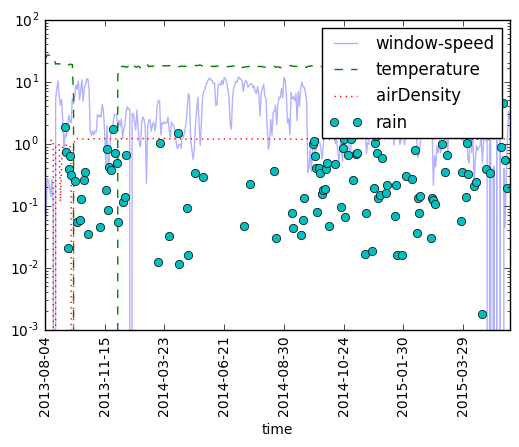

In [19]:
ax = data.plot(style=['-', '--', ':', 'o'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
plt.xticks(rotation=90)
ax.legend()

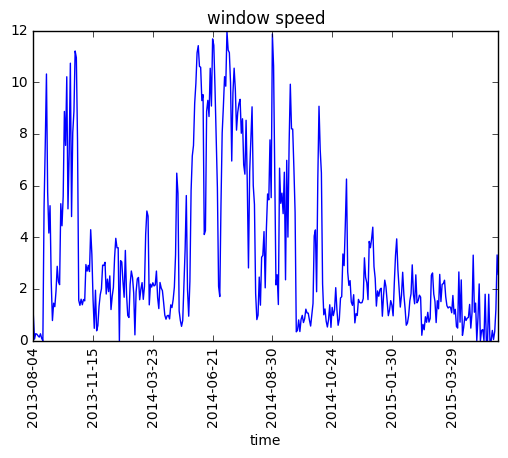

In [7]:
data['window-speed'].plot()
plt.xticks(rotation=90)
plt.title('window speed')

In [249]:
ff = np.array(f)

In [10]:
np.unique(data['rain'].values)

array([ -6.88863375e-04,  -3.00601202e-04,   0.00000000e+00,
         1.77935943e-03,   1.17004680e-02,   1.22605364e-02,
         1.60030628e-02,   1.61764706e-02,   1.62726008e-02,
         1.65472779e-02,   1.89283229e-02,   2.11048159e-02,
         3.00350877e-02,   3.04437564e-02,   3.20055905e-02,
         3.41974078e-02,   3.51502446e-02,   3.57142857e-02,
         4.35236769e-02,   4.58193980e-02,   4.64075383e-02,
         4.70899471e-02,   5.45897644e-02,   5.50239234e-02,
         5.63535912e-02,   5.83407672e-02,   5.89198036e-02,
         6.46443515e-02,   6.73602081e-02,   7.59414226e-02,
         7.70270270e-02,   7.70789658e-02,   7.86062718e-02,
         8.41517857e-02,   9.03985507e-02,   9.57308249e-02,
         1.05466013e-01,   1.14181818e-01,   1.24133811e-01,
         1.27443881e-01,   1.32075472e-01,   1.32996324e-01,
         1.34705228e-01,   1.35849057e-01,   1.37076796e-01,
         1.39578631e-01,   1.46205962e-01,   1.48735955e-01,
         1.53872054e-01,

In [250]:
ff

array(['1375607700', '1375607760', '1375607820', '1375607880', '1375607940'], dtype=object)

In [11]:
data['rain']

time
2013-08-04    0.000000
2013-08-06    0.000000
2013-08-07    0.000000
2013-08-08    0.000000
2013-08-09    0.000000
2013-08-10    0.000000
2013-08-11    0.000000
2013-08-12    0.000000
2013-08-15    0.000000
2013-08-19    0.000000
2013-08-20    0.000000
2013-08-21    0.000000
2013-08-22    0.000000
2013-08-23    0.000000
2013-08-24    0.000000
2013-08-25    0.000000
2013-08-26    0.000000
2013-08-27    1.834925
2013-08-28    0.742921
2013-08-29    0.021105
2013-08-30    0.398765
2013-09-01    0.624043
2013-09-02    0.310726
2013-09-03    0.000000
2013-09-04    0.000000
2013-09-05    0.254986
2013-09-07    0.000000
2013-09-09    0.055024
2013-09-10    0.000000
2013-09-13    0.058341
                ...   
2015-04-09    0.000000
2015-04-10    0.244062
2015-04-11    0.000000
2015-04-12    0.000000
2015-04-13    1.956988
2015-04-14    0.000000
2015-04-15    0.001779
2015-04-16    0.000000
2015-04-17    0.000000
2015-04-18    0.391429
2015-04-19    0.000000
2015-04-22    0.000000
2015-0

In [251]:
'1375607700' in ff

True

In [277]:
window.head()

,time,value
0,1373721060,0
1,1373721120,0
2,1373721180,0.9
3,1373721240,0
4,1373721300,0


In [282]:
window.iloc[[2,3]]

,time,value
2,1373721180,0.9
3,1373721240,0


In [284]:
window.iloc[[0, 1, 2, 3, 4, 5, 6, 7]]

,time,value
0,1373721060,0
1,1373721120,0
2,1373721180,0.9
3,1373721240,0
4,1373721300,0
5,1373721360,0
6,1373721420,0.4
7,1373721480,0


In [289]:
print(type([0, 1, 2, 3, 4, 5, 6, 7]))

<class 'list'>


In [290]:
ll = [0, 1, 2, 3, 4, 5, 6, 7]

In [291]:
window.iloc[ll]

,time,value
0,1373721060,0
1,1373721120,0
2,1373721180,0.9
3,1373721240,0
4,1373721300,0
5,1373721360,0
6,1373721420,0.4
7,1373721480,0
